# Titanic dataset analysis


In [75]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [5]:
# importing the dataset
data = pd.read_csv('train.csv')

In [6]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory data analysis

In [7]:
# Finding missing values
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


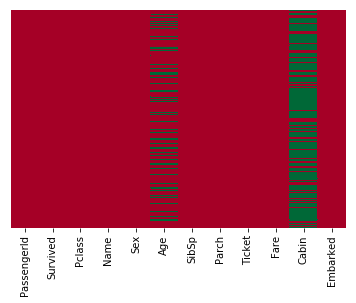

In [15]:
# Visualising null data
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='RdYlGn')

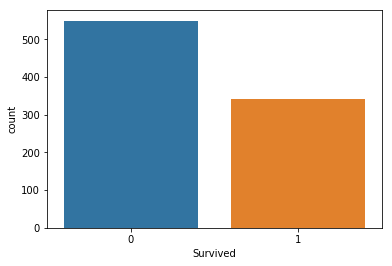

In [16]:
sns.countplot(x='Survived',data=data)

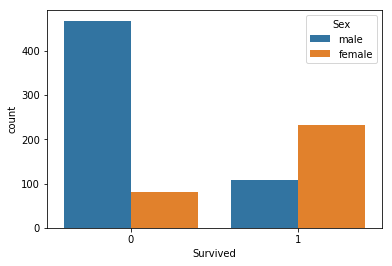

In [19]:
# survival analysis based on sex
sns.countplot(x='Survived',hue='Sex',data=data)

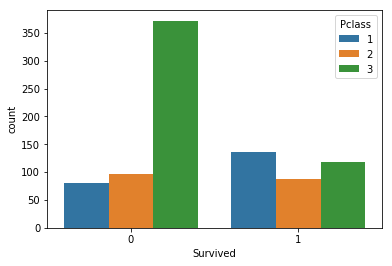

In [20]:
# survival analysis based on class
sns.countplot(x='Survived',hue='Pclass',data=data)

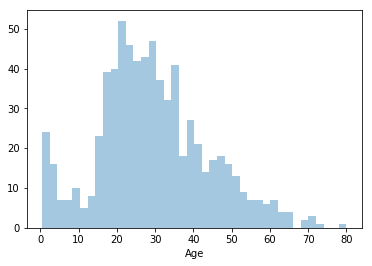

In [30]:
# average age of people on Titanic
sns.distplot(data['Age'].dropna(),kde=False, bins=40)

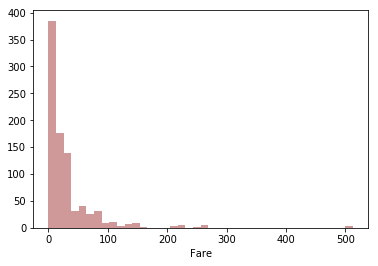

In [32]:
# Average fare of people who bought the ticket
sns.distplot(data['Fare'],kde=False, bins=40,color='darkred')

# Data Cleaning

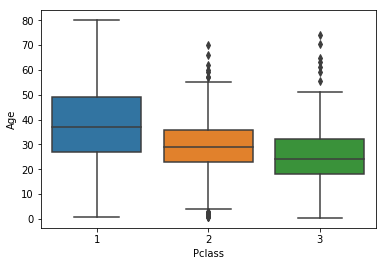

In [34]:
#Average age with respect to passenger class
sns.boxplot(x='Pclass',y='Age',data=data)

In [42]:
# inputting missing age value based on aveerage age in each class
def inputing_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

In [44]:
data['Age']=data[['Age','Pclass']].apply(inputing_age,axis=1)

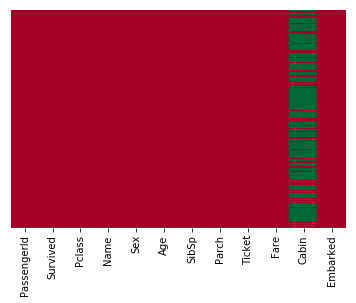

In [45]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='RdYlGn')

In [51]:
data.drop('Cabin',axis=1,inplace=True)

KeyError: "['Cabin'] not found in axis"

In [52]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,25.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,25.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,25.0,0,0,373450,8.0500,S


In [53]:
data.dropna(inplace=True)

# Converting Categorical Features

In [55]:
# creating dummy coloums
Embark = pd.get_dummies(data['Embarked'],drop_first=True)
Sex = pd.get_dummies(data['Sex'],drop_first=True)

In [56]:
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [58]:
data=pd.concat([data,Sex,Embark],axis=1)

In [59]:
data.head(6)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,25.0,1,0,7.2500,1,0,1
1,2,1,1,37.0,1,0,71.2833,0,0,0
2,3,1,3,25.0,0,0,7.9250,0,0,1
3,4,1,1,37.0,1,0,53.1000,0,0,1
4,5,0,3,25.0,0,0,8.0500,1,0,1
5,6,0,3,25.0,0,0,8.4583,1,1,0


# Building Model 

In [62]:
x_train,x_test,y_train,y_test = train_test_split(data.drop(['Survived'],axis=1),data['Survived'],test_size=0.30)

In [64]:
model=LogisticRegression()

In [65]:
model.fit(x_train,y_train)

C:\Users\new\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
y_pred = model.predict(x_test)

In [84]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7602996254681648

Text(33.0, 0.5, 'Actual')

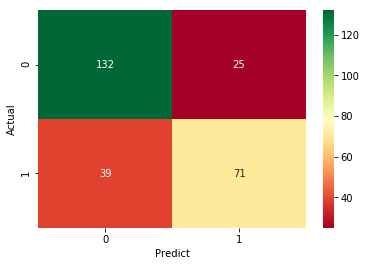

In [80]:
# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True,fmt=".0f",cmap='RdYlGn')
plt.xlabel('Predict')
plt.ylabel('Actual')

In [81]:
# Area Under Curve
fpr,tpr,threshold = roc_curve(y_test,y_pred)
auc_model = auc(fpr,tpr)

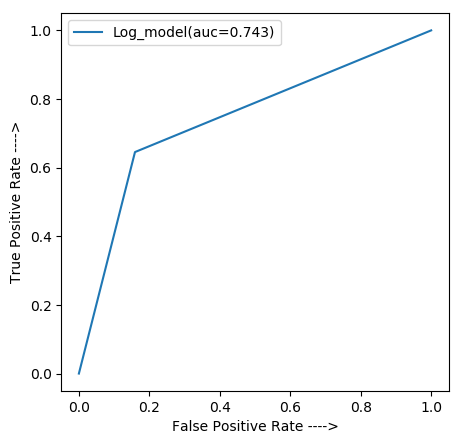

In [82]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,label='Log_model(auc=%0.3f)'%auc_model)
plt.xlabel('False Positive Rate ---->')
plt.ylabel('True Positive Rate ---->')
plt.legend()
plt.show()